In [1]:
using DataFrames, CSV, Dates, Pandas, Plots, PyCall

In [34]:
# https://www.insider.com/celebrities-who-have-died-this-year-2021-1
name = ["Hank Aaron", "Ed Asner", "Sonny Chiba", "Halyna Hutchins", "Cloris Leachman", "Helen McCrory", 
    "Prince Philip", "Christopher Plummer", "Tanya Roberts", "Cicely Tyson"]
gender = ["male", "male", "male", "female", "female", "female", "male", "male", "female", "female"]
death_date = ["2021-01-22", "2021-08-29", "2021-08-19", "2021-10-21", "2021-01-27", "2021-04-16",
    "2021-04-09", "2021-02-05", "2021-01-04", "2021-01-28"
]
df = DataFrames.DataFrame(:name => name, :gender => gender, :death => death_date)
df = df[[1, 5, 8, 9, 10], :]

,name,gender,death
,String,String,String
1,Hank Aaron,male,2021-01-22
2,Cloris Leachman,female,2021-01-27
3,Christopher Plummer,male,2021-02-05
4,Tanya Roberts,female,2021-01-04
5,Cicely Tyson,female,2021-01-28


In [50]:
TrendReq = pyimport("pytrends.request").TrendReq
pytrends = TrendReq(hl="en-US", tz=360)
pytrends.build_payload(df.name, timeframe="2020-12-01 2021-08-01")

In [51]:
trends_data = pytrends.interest_over_time().drop("isPartial", 1)

,Hank Aaron,Cloris Leachman,Christopher Plummer,Tanya Roberts,Cicely Tyson
date,,,,,
2020-12-01,0,0,0,0,0
2020-12-02,0,0,0,0,0
2020-12-03,0,0,0,0,0
2020-12-04,0,0,0,0,0
2020-12-05,0,0,0,0,0
...,...,...,...,...,...
2021-07-28,0,0,0,0,0
2021-07-29,0,0,0,0,0
2021-07-30,0,0,0,0,0


In [52]:
trends = Pandas.reset_index(Pandas.DataFrame(trends_data))
jdf = DataFrames.DataFrame(trends)
jdf_tidy = DataFrames.stack(jdf, 2:6)
rename!(jdf_tidy, [:date, :name, :interest])

,date,name,interest
,DateTime,Cat…,Int64
1,2020-12-01T00:00:00,Hank Aaron,0
2,2020-12-02T00:00:00,Hank Aaron,0
3,2020-12-03T00:00:00,Hank Aaron,0
4,2020-12-04T00:00:00,Hank Aaron,0
5,2020-12-05T00:00:00,Hank Aaron,0
6,2020-12-06T00:00:00,Hank Aaron,0
7,2020-12-07T00:00:00,Hank Aaron,0
8,2020-12-08T00:00:00,Hank Aaron,0
9,2020-12-09T00:00:00,Hank Aaron,0


In [53]:
jdf_tidy.date = Date.(jdf_tidy.date)
gender_dict = Dict(Pair.(df.name, df.gender))
death_dict = Dict(Pair.(df.name, df.death))

Dict{String, String} with 5 entries:
  "Cloris Leachman"     => "2021-01-27"
  "Tanya Roberts"       => "2021-01-04"
  "Cicely Tyson"        => "2021-01-28"
  "Hank Aaron"          => "2021-01-22"
  "Christopher Plummer" => "2021-02-05"

In [54]:
jdf_tidy[:, :gender] = Vector{String}(undef, size(jdf_tidy)[1])
jdf_tidy[:, :death_date] = Vector{Date}(undef, size(jdf_tidy)[1])

1220-element Vector{Date}:
 -41293191080222--42198434155544711-7378697629483820642
 76894211379072--48226781892051107-7378697629483820642
 2493894544754--24113390946025550-7378697629483820618
 15006380499852-42198434155544728-7378697629483820662
 2493985395623--24113390946025546-7378697629483820628
 58192185709069--24113390946025551-7378697629483820624
 -197849446604072-01-3689348814741910334
 -221708058195135-12056695473012777-7378697629483820657
 -167663008165580-12056695473012780-3689348814741910343
 8063842918811-42198434155544722-7378697629483820672
 56623869935370--24113390946025546-7378697629483820618
 -197849446604072-01-3689348814741910334
 108669228362709--18085043209519163-7378697629483820636
 8024301357408--24113390946025545-7378697629483820634
 -197849447247155-08-3689348814741910339
 -143987743686244-05-3689348814741910332
 -197849447246970-06-3689348814741910345
 -197849443927278-06-3689348814741910350
 -122701346123850-18085043209519161-7378697629483820651
 711863027116

In [55]:
for r in eachrow(jdf_tidy)
    if r.name in collect(keys(gender_dict))
        r.gender = gender_dict[r.name]
    end
    if r.name in collect(keys(death_dict))
        r.death_date = Date(death_dict[r.name], "yyyy-mm-dd")
    end
end

In [56]:
jdf_tidy

,date,name,interest,gender,death_date
,Date,Cat…,Int64,String,Date
1,2020-12-01,Hank Aaron,0,male,2021-01-22
2,2020-12-02,Hank Aaron,0,male,2021-01-22
3,2020-12-03,Hank Aaron,0,male,2021-01-22
4,2020-12-04,Hank Aaron,0,male,2021-01-22
5,2020-12-05,Hank Aaron,0,male,2021-01-22
6,2020-12-06,Hank Aaron,0,male,2021-01-22
7,2020-12-07,Hank Aaron,0,male,2021-01-22
8,2020-12-08,Hank Aaron,0,male,2021-01-22
9,2020-12-09,Hank Aaron,0,male,2021-01-22


In [57]:
function getDayValue(a, b)
        (a - b).value
end

getDayValue (generic function with 1 method)

In [59]:
jdf_tidy.distance = getDayValue.(jdf_tidy.date, jdf_tidy.death_date) 
jdf_tidy

,date,name,interest,gender,death_date,distance
,Date,Cat…,Int64,String,Date,Int64
1,2020-12-01,Hank Aaron,0,male,2021-01-22,-52
2,2020-12-02,Hank Aaron,0,male,2021-01-22,-51
3,2020-12-03,Hank Aaron,0,male,2021-01-22,-50
4,2020-12-04,Hank Aaron,0,male,2021-01-22,-49
5,2020-12-05,Hank Aaron,0,male,2021-01-22,-48
6,2020-12-06,Hank Aaron,0,male,2021-01-22,-47
7,2020-12-07,Hank Aaron,0,male,2021-01-22,-46
8,2020-12-08,Hank Aaron,0,male,2021-01-22,-45
9,2020-12-09,Hank Aaron,0,male,2021-01-22,-44


In [90]:
df_new = jdf_tidy[:, [:interest, :gender, :distance]]
# gdf = DataFrames.groupby(df_new, [:gender])

,interest,gender,distance
,Int64,String,Int64
1,0,male,-52
2,0,male,-51
3,0,male,-50
4,0,male,-49
5,0,male,-48
6,0,male,-47
7,0,male,-46
8,0,male,-45
9,0,male,-44


In [60]:
using StatsPlots

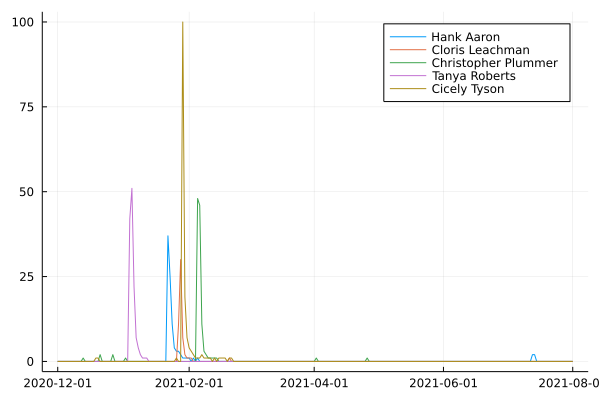

In [65]:
@df jdf_tidy Plots.plot(:date, :interest, group=:name,
    seriestype=:line
)

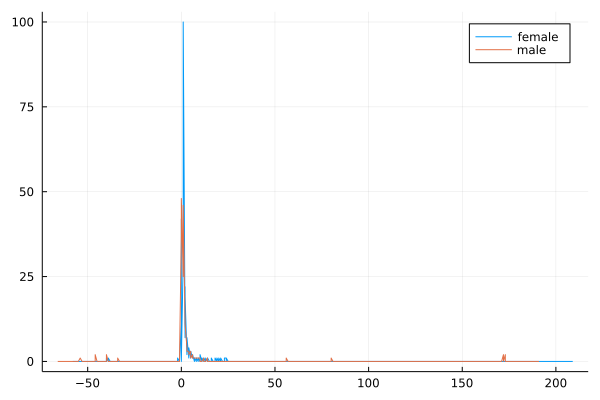

In [86]:
@df jdf_tidy Plots.plot(:distance, :interest, group=:gender,
    seriestype=:line
)

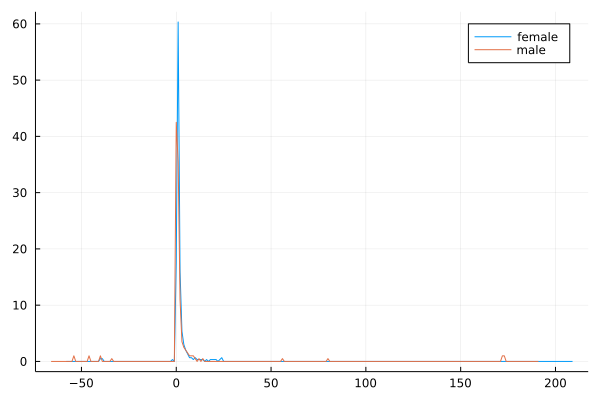

In [80]:
@df df_plots Plots.plot(:distance, :interest_mean, group=:gender,
    seriestype=:line
)